In [1]:
import unittest
from collections import Counter
from copy import deepcopy as _d

import sympy

from mira.metamodel import (
    Concept,
    ControlledConversion,
    GroupedControlledConversion,
    Initial,
    Parameter,
    GroupedControlledProduction,
    TemplateModel,
)
from mira.examples.sir import cities, sir_2_city, sir_parameterized
from mira.examples.concepts import infected, susceptible
from mira.examples.chime import sviivr
from mira.metamodel.ops import stratify, simplify_rate_law

infection = ControlledConversion(
            subject=_d(susceptible),
            outcome=_d(infected),
            controller=_d(infected),
            rate_law=sympy.parse_expr(
                'beta * susceptible_population * infected_population',
                local_dict={'beta': sympy.Symbol('beta')}
            )
        )
    

expected_1 = ControlledConversion(
    subject=susceptible.with_context(vaccination_status="unvaccinated"),
    outcome=infected.with_context(vaccination_status="unvaccinated"),
    controller=infected.with_context(vaccination_status="unvaccinated"),
    rate_law=sympy.parse_expr(
        'beta_2 * susceptible_population_unvaccinated * infected_population_unvaccinated',
        local_dict={'beta_2': sympy.Symbol('beta_2')}
    )
)
expected_2 = ControlledConversion(
    subject=susceptible.with_context(vaccination_status="unvaccinated"),
    outcome=infected.with_context(vaccination_status="unvaccinated"),
    controller=infected.with_context(vaccination_status="vaccinated"),
    rate_law=sympy.parse_expr(
        'beta_3 * susceptible_population_vaccinated * infected_population_vaccinated',
        local_dict={'beta_3': sympy.Symbol('beta_3')}
    )
)
expected_3 = ControlledConversion(
    subject=susceptible.with_context(vaccination_status="vaccinated"),
    outcome=infected.with_context(vaccination_status="vaccinated"),
    controller=infected.with_context(vaccination_status="vaccinated"),
    rate_law=sympy.parse_expr(
        'beta_0 * susceptible_population_vaccinated * infected_population_vaccinated',
        local_dict={'beta_0': sympy.Symbol('beta_0')}
    )
)
expected_4 = ControlledConversion(
    subject=susceptible.with_context(vaccination_status="vaccinated"),
    outcome=infected.with_context(vaccination_status="vaccinated"),
    controller=infected.with_context(vaccination_status="unvaccinated"),
    rate_law=sympy.parse_expr(
        'beta_1 * susceptible_population_vaccinated * infected_population_unvaccinated',
        local_dict={'beta_1': sympy.Symbol('beta_1')}
    )
)

tm = TemplateModel(
    templates=[infection],
    parameters={
        "beta": Parameter(name="beta", value=0.1),
    },
    initials={
        susceptible.name: Initial(concept=susceptible, value=5.0),
        infected.name: Initial(concept=infected, value=7.0),
    }
)
tm_stratified = TemplateModel(
    templates=[expected_1, expected_2, expected_3, expected_4],
    parameters={
        "beta_0": Parameter(name="beta_0", value=0.1),
        "beta_1": Parameter(name="beta_1", value=0.1),
        "beta_2": Parameter(name="beta_2", value=0.1),
        "beta_3": Parameter(name="beta_3", value=0.1),
    },
    initials={
        f"{susceptible.name}_vaccinated": Initial(concept=susceptible, value=5.0),
        f"{susceptible.name}_unvaccinated": Initial(concept=susceptible, value=5.0),
        f"{infected.name}_vaccinated": Initial(concept=susceptible, value=7.0),
        f"{infected.name}_unvaccinated": Initial(concept=susceptible, value=7.0),
    }
)

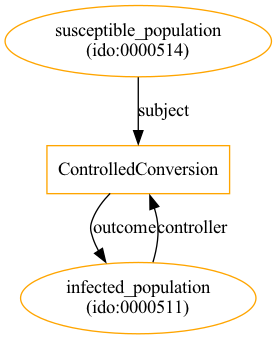

In [2]:
tm.draw_jupyter()

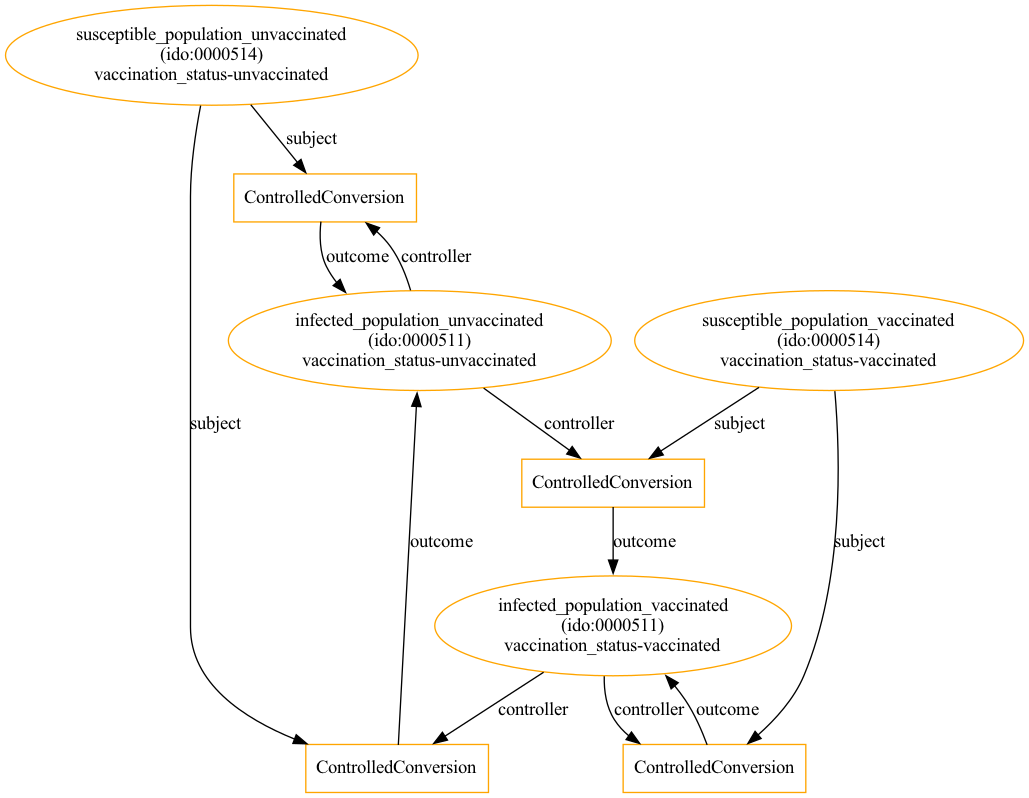

In [3]:
tm_stratified.draw_jupyter()